<a href="https://colab.research.google.com/github/relhwigi/GE_GRAPE_Mammogram_Classification/blob/main/Mammography_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning using Grammatical Evolution**
###Classification of mammogram segments as containing or not containing suspicious growth. 
Ranya El-Hwigi 18227449

### ***Importing libraries***

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

### ***Data Exploration***

There are 2 datasets availble. A larger data set containing the full data and a smaller data set containing a subset of the data.

**Large dataset**

In [20]:
# loading in the full dataset into a pandas dataframe from GitHub
full_data = pd.read_csv('https://media.githubusercontent.com/media/relhwigi/GE_GRAPE_Mammogram_Classification/main/data/haralick02.csv')

# checking the data
full_data.head()

,PatientID,StudyID,PatientAge,ImgID,View,SegmentPosition,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,...,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,Label
0,optm1,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,65,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,CC,LA1,0.019791,70.750121,0.986798,2679.422225,0.280588,147.661857,10646.938779,7.747646,11.202839,0.000314,4.076002,-0.375260,0.997168,0.019626,84.163154,0.984285,2677.867573,0.265944,147.683884,10627.307136,7.747549,11.323964,0.000289,4.197319,-0.358078,0.996413,0.019630,77.824490,0.985561,2694.966117,0.275523,147.909924,10702.039977,7.754164,...,0.009253,87.836024,0.972762,1612.354750,0.234180,125.710824,6361.582974,7.734123,11.454076,0.000271,4.262486,-0.325168,0.994130,0.009331,78.661818,0.975880,1630.642198,0.251513,125.959761,6443.906973,7.742087,11.349892,0.000295,4.170668,-0.341879,0.995351,0.009309,91.440624,0.971643,1612.335914,0.236469,125.710631,6357.903033,7.732227,11.447468,0.000271,4.279557,-0.326134,0.994207,0
1,optm1,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,65,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,CC,RA1,0.994207,-0.326134,4.279557,0.000271,11.447468,7.732227,6357.903033,125.710631,0.236469,1612.335914,0.971643,91.440624,0.009309,0.995351,-0.341879,4.170668,0.000295,11.349892,7.742087,6443.906973,125.959761,0.251513,1630.642198,0.975880,78.661818,0.009331,0.994130,-0.325168,4.262486,0.000271,11.454076,7.734123,6361.582974,125.710824,...,0.996896,-0.368340,4.131941,0.000304,11.259636,7.754164,10702.039977,147.909924,0.275523,2694.966117,0.985561,77.824490,0.019630,0.996413,-0.358078,4.197319,0.000289,11.323964,7.747549,10627.307136,147.683884,0.265944,2677.867573,0.984285,84.163154,0.019626,0.997168,-0.375260,4.076002,0.000314,11.202839,7.747646,10646.938779,147.661857,0.280588,2679.422225,0.986798,70.750121,0.019791,0
2,optm1,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,65,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,CC,LB1,0.176898,29.279795,0.991535,1729.360146,0.543738,69.492803,6888.160789,5.588478,7.678311,0.001063,3.007836,-0.466993,0.995340,0.176755,38.247695,0.988937,1728.676323,0.527879,69.472768,6876.457598,5.587467,7.788665,0.001018,3.140099,-0.444989,0.994189,0.176731,36.386574,0.989479,1729.238136,0.536824,69.479784,6880.565969,5.589269,...,0.092548,49.175862,0.974096,949.183578,0.426549,70.014061,3747.558450,6.123452,8.832584,0.000764,3.565872,-0.374187,0.991387,0.092727,41.654020,0.978061,949.293642,0.442741,70.019677,3755.520550,6.123813,8.724835,0.000808,3.457819,-0.394026,0.993063,0.092775,43.496564,0.977087,949.179329,0.434262,70.013911,3753.220753,6.121706,8.761205,0.000787,3.495691,-0.387325,0.992537,0
3,optm1,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,65,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,CC,RB1,0.992537,-0.387325,3.495691,0.000787,8.761205,6.121706,3753.220753,70.013911,0.434262,949.179329,0.977087,43.496564,0.092775,0.993063,-0.394026,3.457819,0.000808,8.724835,6.123813,3755.520550,70.019677,0.442741,949.293642,0.978061,41.654020,0.092727,0.991387,-0.374187,3.565872,0.000764,8.832584,6.123452,3747.558450,70.014061,...,0.994659,-0.453387,3.096423,0.001041,7.746667,5.589269,6880.565969,69.479784,0.536824,1729.238136,0.989479,36.386574,0.176731,0.994189,-0.444989,3.140099,0.001018,7.788665,5.587467,6876.457598,69.472768,0.527879,1728.676323,0.988937,38.247695,0.176755,0.995340,-0.466993,3.007836,0.001063,7.678311,5.588478,6888.160789,69.492803,0.543738,1729.360146,0.991535,29.279795,0.176898,0
4,optm1,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,65,1.2.826.0.1.3680043.9.3218.1.1.15315205.3583.1...,CC,LC1,0.525843,7.001352,0.994143,597.735239,0.796829,25.326144,2383.939606,2.888570,3.765628,0.003221,1.616226,-0.557700,0.972441,0.526075,8.623873,0.992788,597.848247,0.789314,25.3

**Smaller dataset**

In [21]:
# loading in the sample dataset into a pandas dataframe from GitHub
some_data = pd.read_csv('https://media.githubusercontent.com/media/relhwigi/GE_GRAPE_Mammogram_Classification/main/data/haralick02_250K.csv')

# checking the data
some_data.tail()

,PatientID,StudyID,PatientAge,ImgID,View,SegmentPosition,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,...,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,Label
24994,optm1344,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,66,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,MLO,LC4,0.580839,3.045049,0.997699,661.727190,0.836922,26.268896,2643.863713,2.494799,3.163219,0.003258,1.314591,-0.599526,0.966099,0.580497,7.801042,0.994106,661.792593,0.815975,26.252181,2639.369329,2.496087,3.296281,0.003155,1.509786,-0.539391,0.955178,0.580715,5.653316,0.995729,661.779929,0.824111,26.248573,2641.466402,2.496146,...,0.740933,4.768997,0.996091,609.972040,0.893421,17.894553,2435.119162,1.634581,2.096980,0.004058,0.990489,-0.595274,0.911536,0.740852,5.103426,0.995816,609.850151,0.896355,17.890689,2434.297178,1.635636,2.084555,0.004073,0.977859,-0.603467,0.913760,0.740632,7.332761,0.993989,609.970714,0.890533,17.894517,2432.550097,1.636074,2.120537,0.004044,1.030084,-0.579495,0.907051,0
24995,optm1344,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,66,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,MLO,RC4,0.907051,-0.579495,1.030084,0.004044,2.120537,1.636074,2432.550097,17.894517,0.890533,609.970714,0.993989,7.332761,0.740632,0.913760,-0.603467,0.977859,0.004073,2.084555,1.635636,2434.297178,17.890689,0.896355,609.850151,0.995816,5.103426,0.740852,0.911536,-0.595274,0.990489,0.004058,2.096980,1.634581,2435.119162,17.894553,...,0.959646,-0.562159,1.439089,0.003190,3.244839,2.496146,2641.466402,26.248573,0.824111,661.779929,0.995729,5.653316,0.580715,0.955178,-0.539391,1.509786,0.003155,3.296281,2.496087,2639.369329,26.252181,0.815975,661.792593,0.994106,7.801042,0.580497,0.966099,-0.599526,1.314591,0.003258,3.163219,2.494799,2643.863713,26.268896,0.836922,661.727190,0.997699,3.045049,0.580839,0
24996,optm1344,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,66,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,MLO,LD4,0.826577,0.954606,0.998275,276.728460,0.940576,9.732558,1105.959234,1.102387,1.339445,0.007334,0.598755,-0.672619,0.861793,0.826406,3.155421,0.994277,275.694855,0.929461,9.693805,1099.623999,1.102562,1.406288,0.007233,0.706477,-0.601921,0.837899,0.826833,1.641757,0.997022,275.683547,0.935430,9.694291,1101.092433,1.100626,...,0.954617,0.496889,0.997059,84.471798,0.983721,2.450195,337.390304,0.332656,0.396962,0.005391,0.206537,-0.708741,0.594332,0.954392,0.957006,0.994345,84.616243,0.982837,2.456086,337.507966,0.334070,0.402915,0.005385,0.219292,-0.691725,0.589005,0.954291,1.905002,0.988724,84.475163,0.981381,2.450326,335.995648,0.334633,0.412324,0.005377,0.236487,-0.658832,0.577138,0
24997,optm1344,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,66,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,MLO,RD4,0.577138,-0.658832,0.236487,0.005377,0.412324,0.334633,335.995648,2.450326,0.981381,84.475163,0.988724,1.905002,0.954291,0.589005,-0.691725,0.219292,0.005385,0.402915,0.334070,337.507966,2.456086,0.982837,84.616243,0.994345,0.957006,0.954392,0.594332,-0.708741,0.206537,0.005391,0.396962,0.332656,337.390304,2.450195,...,0.851051,-0.640413,0.648221,0.007284,1.367621,1.100626,1101.092433,9.694291,0.935430,275.683547,0.997022,1.641757,0.826833,0.837899,-0.601921,0.706477,0.007233,1.406288,1.102562,1099.623999,9.693805,0.929461,275.694855,0.994277,3.155421,0.826406,0.861793,-0.672619,0.598755,0.007334,1.339445,1.102387,1105.959234,9.732558,0.940576,276.728460,0.998275,0.954606,0.826577,0
24998,optm1344,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,66,1.2.826.0.1.3680043.9.3218.1.1.1404259.6176.15...,MLO,LE4,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.00

**Extracting information on the data**

*Size of full dataset*

In [22]:
# number of rows in full dataset
full_number_of_samples = full_data['PatientID'].count()
full_number_of_samples

405280

*Size of sample dataset*

In [23]:
# number of rows in some dataset
some_number_of_samples = some_data['PatientID'].count()
some_number_of_samples

24999

*Visualisation of size difference*

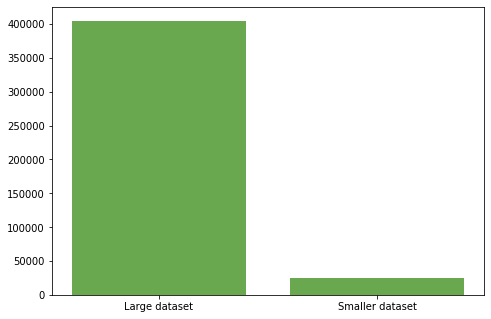

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sets = ['Large dataset', 'Smaller dataset']
samples = [full_number_of_samples, some_number_of_samples]
ax.bar(sets,samples, color="#6aa84f")
plt.show()

*Full dataset label distribution*

In [25]:
# number of positive and negative cases in full dataset
full_label_distribution = full_data['Label'].value_counts()
full_label_distribution

0    393021
1     12259
Name: Label, dtype: int64


*Visualisation of label distribution*

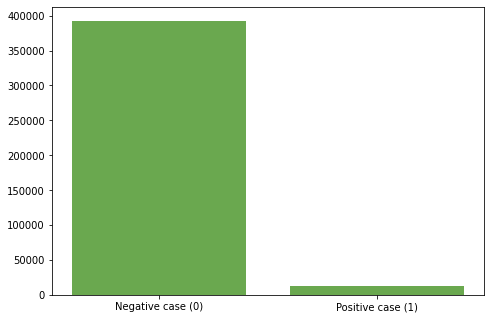

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Negative case (0)', 'Positive case (1)']
ax.bar(label , full_label_distribution, color="#6aa84f")
plt.show()

*Some dataset label distribution*

In [27]:
# number of positive and negative cases in some dataset
some_label_distribution = some_data['Label'].value_counts()
some_label_distribution

0    24018
1      981
Name: Label, dtype: int64

*Mammogram views*

In [34]:
# the different mammogram views in the dataset
views = full_data.View.unique()
views

array(['CC', 'MLO', 'XCCL', 'ML', 'LM'], dtype=object)

In [41]:
# getting the number of times each row occurs
CC_popularity = len(full_data.loc[full_data['View'] == 'CC'])
MLO_popularity = len(full_data.loc[full_data['View'] == 'MLO'])
XCCL_popularity = len(full_data.loc[full_data['View'] == 'XCCL'])
ML_popularity = len(full_data.loc[full_data['View'] == 'ML'])
LM_popularity = len(full_data.loc[full_data['View'] == 'LM'])

In [60]:
CC_popularity

205520

In [61]:
MLO_popularity

199320

In [62]:
XCCL_popularity

120

In [63]:
ML_popularity

240

In [64]:
LM_popularity

80

*Percentage of samples that are CC or MLO view*

In [66]:
((CC_popularity+MLO_popularity)/full_number_of_samples)*100

99.89143308330043

*Mammogram segments*

In [35]:
# the different mammogram segments in the dataset
segments = full_data.SegmentPosition.unique()
segments

array(['LA1', 'RA1', 'LB1', 'RB1', 'LC1', 'RC1', 'LD1', 'RD1', 'LE1',
       'RE1', 'LA2', 'RA2', 'LB2', 'RB2', 'LC2', 'RC2', 'LD2', 'RD2',
       'LE2', 'RE2', 'LA3', 'RA3', 'LB3', 'RB3', 'LC3', 'RC3', 'LD3',
       'RD3', 'LE3', 'RE3', 'LA4', 'RA4', 'LB4', 'RB4', 'LC4', 'RC4',
       'LD4', 'RD4', 'LE4', 'RE4'], dtype=object)

*Approximate number of patients in full dataset*

In [36]:
len(full_data.PatientID.unique())

4919

Approximate number of patients in sample dataset

In [37]:
len(some_data.PatientID.unique())

315

*Columns in the datasets*

In [ ]:
number_of_all_columns = len(full_data.columns)
number_of_all_columns

111

In [ ]:
# the column names in both datasets are the same, extracting them here
all_columns = full_data.columns.to_list()
all_columns

['PatientID',
 'StudyID',
 'PatientAge',
 'ImgID',
 'View',
 'SegmentPosition',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49',
 'x50',
 'x51',
 'x52',
 'x53',
 'x54',
 'x55',
 'x56',
 'x57',
 'x58',
 'x59',
 'x60',
 'x61',
 'x62',
 'x63',
 'x64',
 'x65',
 'x66',
 'x67',
 'x68',
 'x69',
 'x70',
 'x71',
 'x72',
 'x73',
 'x74',
 'x75',
 'x76',
 'x77',
 'x78',
 'x79',
 'x80',
 'x81',
 'x82',
 'x83',
 'x84',
 'x85',
 'x86',
 'x87',
 'x88',
 'x89',
 'x90',
 'x91',
 'x92',
 'x93',
 'x94',
 'x95',
 'x96',
 'x97',
 'x98',
 'x99',
 'x100',
 'x101',
 'x102',
 'x103',
 'Label']

### ***Data Preprocessing***

The data is already very clean and concise but there are a few columns that are unnecessary for the task at hand. 

**Dropping columns from large dataset**

In [ ]:
full_data.drop(['PatientID', 'StudyID', 'PatientAge', 'ImgID', 'View', 'SegmentPosition'], axis=1, inplace=True)
final_columns = full_data.columns.to_list()
final_columns

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49',
 'x50',
 'x51',
 'x52',
 'x53',
 'x54',
 'x55',
 'x56',
 'x57',
 'x58',
 'x59',
 'x60',
 'x61',
 'x62',
 'x63',
 'x64',
 'x65',
 'x66',
 'x67',
 'x68',
 'x69',
 'x70',
 'x71',
 'x72',
 'x73',
 'x74',
 'x75',
 'x76',
 'x77',
 'x78',
 'x79',
 'x80',
 'x81',
 'x82',
 'x83',
 'x84',
 'x85',
 'x86',
 'x87',
 'x88',
 'x89',
 'x90',
 'x91',
 'x92',
 'x93',
 'x94',
 'x95',
 'x96',
 'x97',
 'x98',
 'x99',
 'x100',
 'x101',
 'x102',
 'x103',
 'Label']

**Dropping columns from smaller dataset**

In [ ]:
some_data.drop(['PatientID', 'StudyID', 'PatientAge', 'ImgID', 'View', 'SegmentPosition'], axis=1, inplace=True)
some_data.columns.to_list()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49',
 'x50',
 'x51',
 'x52',
 'x53',
 'x54',
 'x55',
 'x56',
 'x57',
 'x58',
 'x59',
 'x60',
 'x61',
 'x62',
 'x63',
 'x64',
 'x65',
 'x66',
 'x67',
 'x68',
 'x69',
 'x70',
 'x71',
 'x72',
 'x73',
 'x74',
 'x75',
 'x76',
 'x77',
 'x78',
 'x79',
 'x80',
 'x81',
 'x82',
 'x83',
 'x84',
 'x85',
 'x86',
 'x87',
 'x88',
 'x89',
 'x90',
 'x91',
 'x92',
 'x93',
 'x94',
 'x95',
 'x96',
 'x97',
 'x98',
 'x99',
 'x100',
 'x101',
 'x102',
 'x103',
 'Label']

**Number of columns remaining**

In [ ]:
final_number_of_columns = len(final_columns)
final_number_of_columns

105